# Filter + Fourier Transform + png exports 

* Load .mat data, no down sampling
* Convert to pd.DataFrame
* Filter timeseries with one highpass 0.5 Hz and one lowpass 50 Hz filters
* Apply consecutive Fourier Transforms
* Export as images (interictal.png or preictal.png)

## For one segment

In [180]:
import pywt
import os
import random
import numpy as np
import pandas as pd
import scipy.io
from scipy import signal
import matplotlib.pyplot as plt

In [154]:
interictal_test = scipy.io.loadmat('../raw_data/Dog_1/Dog_1/Dog_1_interictal_segment_0001.mat')
preictal_test = scipy.io.loadmat('../raw_data/Dog_1/Dog_1/Dog_1_preictal_segment_0001.mat')
interictal_test = pd.DataFrame(interictal_test['interictal_segment_1'][0][0][0])
preictal_test = pd.DataFrame(preictal_test['preictal_segment_1'][0][0][0])

In [155]:
sos_hp = signal.butter(10, 0.5, 'highpass', fs=400, output='sos')
sos_lp = signal.butter(10, 50, 'lowpass', fs=400, output='sos')
filtered_inter_hp = signal.sosfilt(sos_hp, interictal_test.loc[0])
filtered_inter = signal.sosfilt(sos_lp, filtered_inter_hp)

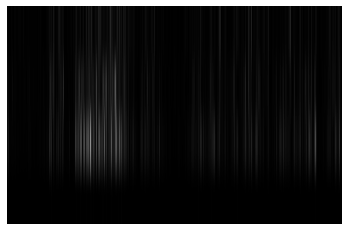

In [158]:
f, t, Sxx = spectrogram(filtered_inter, fs=400, nperseg=256)
plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
plt.axis('off')
plt.savefig('../raw_data/interictal_images/img1.png', bbox_inches='tight',pad_inches = 0)

In [141]:
from PIL import Image
# Open the image form working directory
image = Image.open('../raw_data/interictal_images/img1.png')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

PNG
(334, 217)
RGBA


In [144]:
data = np.asarray(image)
data.shape

## For all segments in all dogs

In [189]:
dirs = ['Dog_4', 'Dog_5']

In [190]:
len(files)

1440

Dog_4
97
Dog_4_preictal_segment_0093.mat
Dog_4_preictal_segment_0087.mat
Dog_4_preictal_segment_0050.mat
Dog_4_preictal_segment_0044.mat
Dog_4_preictal_segment_0078.mat
Dog_4_preictal_segment_0079.mat
Dog_4_preictal_segment_0045.mat
Dog_4_preictal_segment_0051.mat


KeyboardInterrupt: 

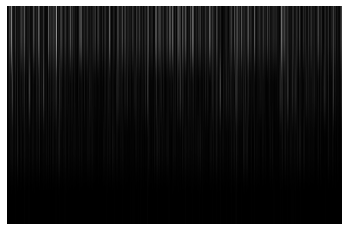

In [192]:
sos_hp = signal.butter(10, 0.5, 'highpass', fs=400, output='sos')
sos_lp = signal.butter(10, 50, 'lowpass', fs=400, output='sos')
for directory in dirs:
    print(directory)
    folder_path = f'../raw_data/{directory}/{directory}'
    files = []
    a = 1
    b = 1
    for f in os.listdir(folder_path):
        if ('preictal' in f):
            files.append(f)
    print(len(files))
    for file in files:
        print(file)
        data = scipy.io.loadmat(f'../raw_data/{directory}/{directory}/{file}')
        segment_name = list(data.keys())[-1]
        segment = pd.DataFrame(data[segment_name][0][0][0])
        for index, row in segment.iterrows():
            electrode = signal.sosfilt(sos_hp, row)
            electrode_filtered = signal.sosfilt(sos_lp, electrode)
            f, t, Sxx = signal.spectrogram(electrode_filtered, fs=400, nperseg=256)
            plt.imshow(Sxx[f<5,],aspect='auto',origin='lower',cmap='Greys_r')
            plt.axis('off')
            if 'preictal' in file:
                plt.savefig(f'../raw_data/preictal_images/{directory}_img{a}.png', bbox_inches='tight',pad_inches = 0)
            else:
                plt.savefig(f'../raw_data/interictal_images/{directory}_img{b}.png', bbox_inches='tight',pad_inches = 0)
            a = a+1
            b = b+1